In [1]:
# 실습에필요한패키지불러오기
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from IPython.display import Image
%matplotlib inline

In [2]:
from sklearn import datasets
iris = datasets.load_iris()

In [3]:
# 첫번째(sepal length)[0]와세번째(petal length)[2] 변수만추출하여 x로할당
x = iris.data[:, [0, 2]] 
y = iris.target

In [4]:
# 학습자료와 검증자료 분리
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.3, random_state=1, stratify=y) #계층 추출

In [5]:
# 표준화 (평균0, 표준편차 1) 
from sklearn.preprocessing import StandardScaler

sc= StandardScaler()
sc.fit(x_train)

StandardScaler()

In [6]:
## numpy.ndarray 형식으로 출력
x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)

In [7]:
# x_train_std의평균과 표준편차 - array 형태
print('Mean of x_train_std:',np.mean(x_train_std[:,0]), np.mean(x_train_std[:,1]))
print('Stdof x_train_std:',np.std(x_train_std[:,0]), np.std(x_train_std[:,1]))

Mean of x_train_std: 1.541623971336646e-15 1.1207965772406342e-16
Stdof x_train_std: 1.0 1.0


In [8]:
#2) SVM을 사용하여 모델 분석

## C가작은경우(오분류를관대하게허용)
## SVC 클래스에 kernel='linear', 시드넘버는1, C=0.1로 설정
from sklearn.svm import SVC
svm_smallc= SVC(kernel='linear', random_state=1, C=0.1) ## SVC: classification ,SVR: regression
svm_smallc.fit(x_train_std, y_train)

SVC(C=0.1, kernel='linear', random_state=1)

In [9]:
# 표준화된 것과 안된 것
x_combined_std= np.vstack((x_train_std, x_test_std))
y_combined= np.hstack((y_train, y_test))

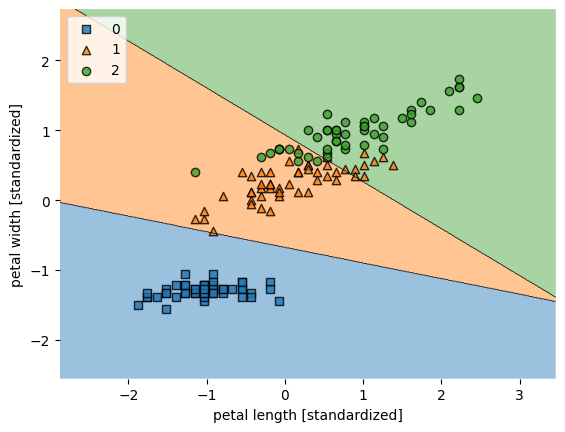

In [11]:
# 데이터와 결정 경계그림
# !pip install mlxtend

from mlxtend.plotting import plot_decision_regions

plot_decision_regions(x_combined_std, y_combined, clf=svm_smallc)
plt.xlabel('petal length [standardized]') #x축
plt.ylabel('petal width [standardized]')  #y축
plt.legend(loc='upper left')

In [12]:
# 예측값과 관측값 비교
y_pred= svm_smallc.predict(x_test_std)
y_pred,(y_test!= y_pred)
print('Misclassified samples: %d' % (y_test!= y_pred).sum()) #10개의 샘플이 잘못 분류되었다고 출력

Misclassified samples: 10


In [13]:
# 정확도 계산
from sklearn.metrics import accuracy_score

print('Accuracy: %.2f' % accuracy_score(y_test, y_pred)) # 정답과 추정값 비교

Accuracy: 0.78


In [14]:
# C가큰경우(오분류를엄격하게허용)
# SVC 클래스에kernel='linear', 시드넘버는1, C=10로 설정 -> C값에 따라 모델의 정확도가 달라짐 
svm_largec= SVC(kernel='linear', random_state=1, C=10)
svm_largec.fit(x_train_std, y_train)

SVC(C=10, kernel='linear', random_state=1)

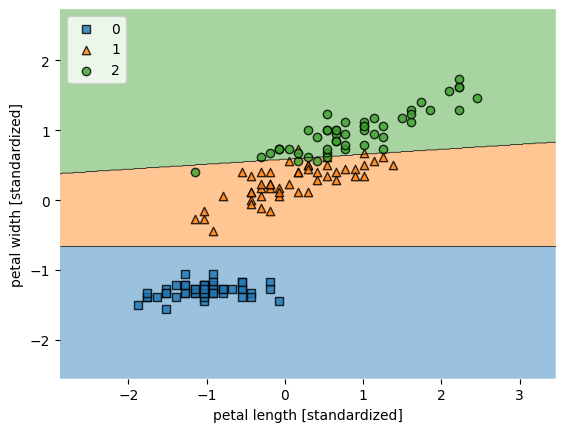

In [15]:
# 데이터와 결정경계그림
plot_decision_regions(x_combined_std, y_combined, clf=svm_largec)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

In [16]:
# 예측값과 관측값 비교
y_pred= svm_largec.predict(x_test_std)
y_pred,(y_test!= y_pred)

print('Misclassified samples: %d' % (y_test!= y_pred).sum())

Misclassified samples: 1


In [17]:
#정확도 계산
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.98


In [18]:
# Kernel SVM : Gamma의값에 따른 결정경계면의 변화
# gamma가작을때: 1
# SVC 클래스에kernel='rbf', 시드넘버는1, gamma=1로 설정

svm_k_smallg= SVC(kernel='rbf', random_state=1, gamma=1)
svm_k_smallg.fit(x_train_std, y_train)

SVC(gamma=1, random_state=1)

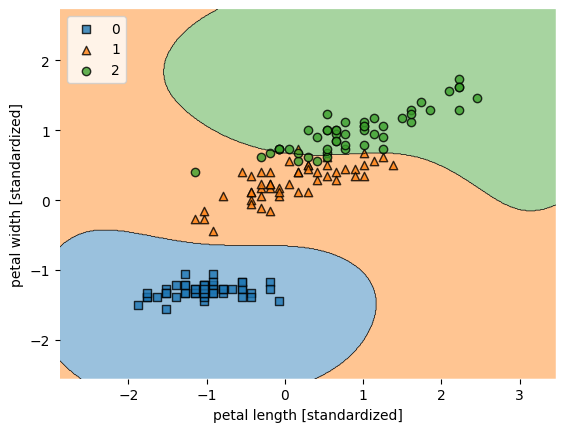

In [19]:
# 데이터와 결정경계그림
plot_decision_regions(x_combined_std, y_combined, clf=svm_k_smallg)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

In [20]:
# 예측값과 관측값 비교
y_pred= svm_k_smallg.predict(x_test_std)
y_pred,(y_test!= y_pred)

print('Misclassified samples: %d' % (y_test!= y_pred).sum())#단순하지만 위 모델모다 성능이 좋을 수 있음 

Misclassified samples: 4


In [21]:
# 정확도 계산
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.91


In [22]:
# Kernel SVM : Gamma의값에 따른 결정경계면의 변화
# gamma가클때: 100
# SVC 클래스에kernel='rbf', 시드넘버는1, "gamma=100"로 설정
svm_k_largeg= SVC(kernel='rbf', random_state=1, gamma=100)
svm_k_largeg.fit(x_train_std, y_train)

SVC(gamma=100, random_state=1)

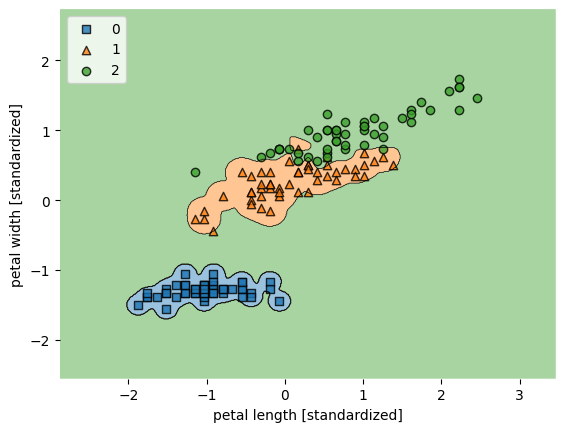

In [23]:
# 데이터와 결정경계그림
plot_decision_regions(x_combined_std, y_combined, clf=svm_k_largeg)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left') #gamma를 크기 했더니 오버피팅일어남 -> 복잡해짐 

In [24]:
# 예측값과 관측값 비교
y_pred= svm_k_largeg.predict(x_test_std)
y_pred,(y_test!= y_pred)
print('Misclassified samples: %d' % (y_test!= y_pred).sum())

Misclassified samples: 2


In [25]:
# 정확도 계산
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred)) # 총 50개

Accuracy: 0.96
